In [1]:
pip install keras


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


pip install tensorflow

In [3]:
import keras

In [4]:
import tensorflow

In [10]:
import matplotlib.pyplot as plt

In [12]:

(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

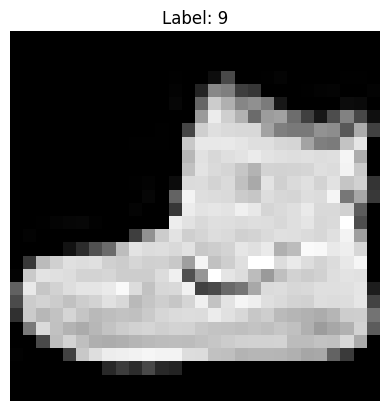

In [16]:




# Select one image from the training set
image_index = 0  # Change this index to select a different image
selected_image = x_train[image_index]
selected_label = y_train[image_index]

# Display the selected image
plt.imshow(selected_image, cmap='gray')
plt.title(f"Label: {selected_label}")
plt.axis('off')  # Hide the axes
plt.show()

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.6266 - loss: 0.6574 - val_accuracy: 0.7867 - val_loss: 0.5474 - learning_rate: 0.0010
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8233 - loss: 0.4950 - val_accuracy: 0.8533 - val_loss: 0.4620 - learning_rate: 0.0010
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8400 - loss: 0.4342 - val_accuracy: 0.8533 - val_loss: 0.4097 - learning_rate: 0.0010
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8532 - loss: 0.3715 - val_accuracy: 0.8733 - val_loss: 0.3805 - learning_rate: 0.0010
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8733 - loss: 0.3122 - val_accuracy: 0.8467 - val_loss: 0.3667 - learning_rate: 0.0010
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9000 - loss: 0.2912 - val_accuracy: 0.8600 - val_loss: 0.3599 - learning_rate: 0.0010
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8961 - loss: 0.2962 - val_

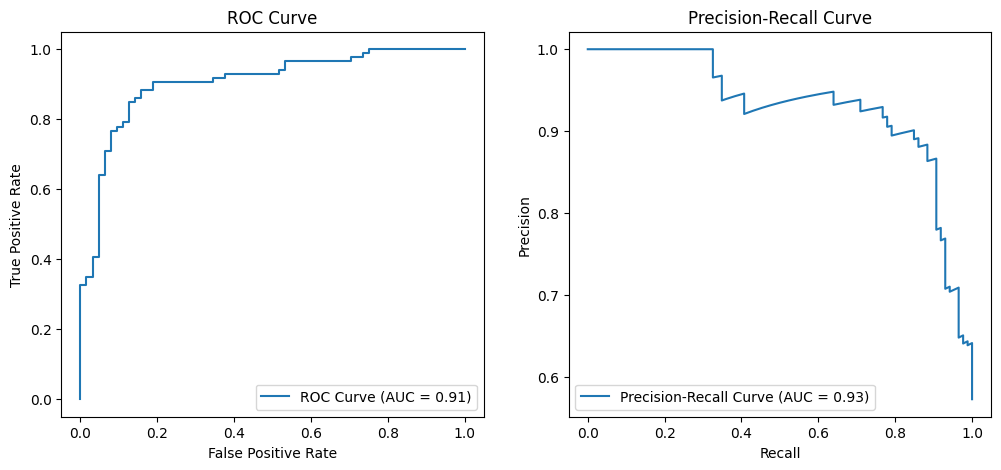

Train Accuracy: 0.9685714244842529
Validation Accuracy: 0.8733333349227905
Variance: 0.03142857551574707
Bias: 0.0952380895614624
Accuracy: 0.86
Precision: 0.8823529411764706
Recall: 0.872093023255814
Confusion Matrix: 
[[54 10]
 [11 75]]
True Positive: 75
True Negative: 54
False Positive: 10
False Negative: 11


In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Assume we have a dataset in a DataFrame `df` with features in `X` and target in `y`
# df = pd.read_csv('data.csv')
# X = df.drop('target', axis=1)
# y = df['target']

# For this example, let's create a synthetic dataset
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Build the neural network
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

# Train the model
history = model.fit(X_train_scaled, y_train,
                    validation_data=(X_val_scaled, y_val),
                    epochs=100,
                    callbacks=[early_stopping, model_checkpoint, reduce_lr],
                    verbose=1)

# Load the best model
model.load_weights('best_model.keras')

# Evaluate the model on test data
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

# ROC Curve and Precision-Recall Curve
y_prob = model.predict(X_test_scaled).ravel()
fpr, tpr, _ = roc_curve(y_test, y_prob)
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_prob)

roc_auc = auc(fpr, tpr)
pr_auc = auc(recall_curve, precision_curve)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(recall_curve, precision_curve, label=f'Precision-Recall Curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

plt.show()

# Variance and Bias calculation
train_accuracy = max(history.history['accuracy'])
val_accuracy = max(history.history['val_accuracy'])
optimal_accuracy = 1.0  # 100%

variance = abs(train_accuracy - optimal_accuracy)
bias = abs(train_accuracy - val_accuracy)

print(f"Train Accuracy: {train_accuracy}")
print(f"Validation Accuracy: {val_accuracy}")
print(f"Variance: {variance}")
print(f"Bias: {bias}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Confusion Matrix: \n{conf_matrix}")
print(f"True Positive: {TP}")
print(f"True Negative: {TN}")
print(f"False Positive: {FP}")
print(f"False Negative: {FN}")
